<a href="https://colab.research.google.com/github/ticopycs/ticopycs/blob/main/ExamenFinalIntegrador_ProgramacionCienciaDatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
#Reale Latini, Martín Gabriel

# **Trabajo Final Integrador**

## **Programación para Ciencia de Datos**

**Dataset:** Student Dropout Analysis for School Education



Este conjunto de datos proporciona una visión integral de los estudiantes matriculados en diversas carreras universitarias ofrecidas en una institución de educación superior. Incluye datos demográficos, factores socioeconómicos e información sobre el rendimiento académico que pueden utilizarse para analizar los posibles predictores de la deserción estudiantil y el éxito académico. Este conjunto de datos contiene múltiples bases de datos separadas que contienen información relevante disponible en el momento de la inscripción, como el modo de solicitud, el estado civil, el curso elegido y más. Además, estos datos se pueden utilizar para estimar el desempeño general de los estudiantes al final de cada semestre mediante la evaluación de las unidades curriculares acreditadas/matriculadas/evaluadas/aprobadas, así como sus respectivas calificaciones. Finalmente, tenemos la tasa de desempleo, la tasa de inflación y el PIB de la región que pueden ayudarnos a comprender mejor cómo influyen los factores económicos en las tasas de deserción estudiantil o en los resultados de éxito académico. Esta poderosa herramienta de análisis proporcionará información valiosa sobre lo que motiva a los estudiantes a permanecer en la escuela o abandonar sus estudios para una amplia gama de disciplinas como la agronomía, el diseño, la educación, la enfermería, el periodismo, la gestión, los servicios sociales o las tecnologías.


Importamos las librerias necesarias y leemos el archivo .csv

In [78]:
library(tidyverse)
library(readxl)
library(ggplot2)
install.packages("corrplot")
library(corrplot)
install.packages("gridExtra")
library(gridExtra)
library(dplyr)
library(cluster)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [79]:
# Cargar el dataset desde el archivo CSV
df <- read_csv("studentsdropoutandacademicsuccess.csv")

# Mostrar las primeras filas del dataset
head(df)

# Resumen del dataset
summary(df)

# Estructura del dataset
str(df)

Rows: 4424 Columns: 35
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Target
dbl (34): Marital status, Application mode, Application order, Course, Dayti...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,⋯,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,8,5,2,1,1,1,13,10,6,⋯,0,0,0,0,0.00000,0,10.8,1.4,1.74,Dropout
1,6,1,11,1,1,1,1,3,4,⋯,0,6,6,6,13.66667,0,13.9,-0.3,0.79,Graduate
1,1,5,5,1,1,1,22,27,10,⋯,0,6,0,0,0.00000,0,10.8,1.4,1.74,Dropout
1,8,2,15,1,1,1,23,27,6,⋯,0,6,10,5,12.40000,0,9.4,-0.8,-3.12,Graduate
2,12,1,3,0,1,1,22,28,10,⋯,0,6,6,6,13.00000,0,13.9,-0.3,0.79,Graduate
2,12,1,17,0,12,1,22,27,10,⋯,0,5,17,5,11.50000,5,16.2,0.3,-0.92,Graduate


 Marital status  Application mode Application order     Course      
 Min.   :1.000   Min.   : 1.000   Min.   :0.000     Min.   : 1.000  
 1st Qu.:1.000   1st Qu.: 1.000   1st Qu.:1.000     1st Qu.: 6.000  
 Median :1.000   Median : 8.000   Median :1.000     Median :10.000  
 Mean   :1.179   Mean   : 6.887   Mean   :1.728     Mean   : 9.899  
 3rd Qu.:1.000   3rd Qu.:12.000   3rd Qu.:2.000     3rd Qu.:13.000  
 Max.   :6.000   Max.   :18.000   Max.   :9.000     Max.   :17.000  
 Daytime/evening attendance Previous qualification  Nacionality    
 Min.   :0.0000             Min.   : 1.000         Min.   : 1.000  
 1st Qu.:1.0000             1st Qu.: 1.000         1st Qu.: 1.000  
 Median :1.0000             Median : 1.000         Median : 1.000  
 Mean   :0.8908             Mean   : 2.531         Mean   : 1.255  
 3rd Qu.:1.0000             3rd Qu.: 1.000         3rd Qu.: 1.000  
 Max.   :1.0000             Max.   :17.000         Max.   :21.000  
 Mother's qualification Father's qualific

spc_tbl_ [4,424 × 35] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Marital status                                : num [1:4424] 1 1 1 1 2 2 1 1 1 1 ...
 $ Application mode                              : num [1:4424] 8 6 1 8 12 12 1 9 1 1 ...
 $ Application order                             : num [1:4424] 5 1 5 2 1 1 1 4 3 1 ...
 $ Course                                        : num [1:4424] 2 11 5 15 3 17 12 11 10 10 ...
 $ Daytime/evening attendance                    : num [1:4424] 1 1 1 1 0 0 1 1 1 1 ...
 $ Previous qualification                        : num [1:4424] 1 1 1 1 1 12 1 1 1 1 ...
 $ Nacionality                                   : num [1:4424] 1 1 1 1 1 1 1 1 15 1 ...
 $ Mother's qualification                        : num [1:4424] 13 1 22 23 22 22 13 22 1 1 ...
 $ Father's qualification                        : num [1:4424] 10 3 27 27 28 27 28 27 1 14 ...
 $ Mother's occupation                           : num [1:4424] 6 4 10 6 10 10 8 10 10 5 ...
 $ Father's occupation     

Examinando las columnas, podemos verificar que la única columna no numérica es 'Target'. Como el análisis de nuestro DF estará basado en ella, la transformaremos a factor para trabajar con más facilidad

In [80]:
#Cambio de tipo de dato en la columna Target
df$Target <- factor(df$Target)
head(df)

Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,⋯,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,8,5,2,1,1,1,13,10,6,⋯,0,0,0,0,0.00000,0,10.8,1.4,1.74,Dropout
1,6,1,11,1,1,1,1,3,4,⋯,0,6,6,6,13.66667,0,13.9,-0.3,0.79,Graduate
1,1,5,5,1,1,1,22,27,10,⋯,0,6,0,0,0.00000,0,10.8,1.4,1.74,Dropout
1,8,2,15,1,1,1,23,27,6,⋯,0,6,10,5,12.40000,0,9.4,-0.8,-3.12,Graduate
2,12,1,3,0,1,1,22,28,10,⋯,0,6,6,6,13.00000,0,13.9,-0.3,0.79,Graduate
2,12,1,17,0,12,1,22,27,10,⋯,0,5,17,5,11.50000,5,16.2,0.3,-0.92,Graduate


Ahora convertimos la las filas de Target a un Id, según la siguiente nomenclatura: "Graduated", 1 - "Dropout", 2 - "Enrolled", 3

In [81]:
#Funcion map para cambiar el valor de la columna Target por un ID
df <- df |>
  mutate(Target = ifelse(Target == "Graduated", 1,
                          ifelse(Target == "Enrolled", 3,
                                   ifelse(Target == "Dropout", 2, Target))))

print(df$Target)

   [1] 2 3 2 3 3 3 3 2 3 2 3 3 2 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2
  [38] 2 3 2 2 3 3 2 2 3 3 3 3 3 3 3 3 3 2 3 2 2 3 3 3 3 3 3 3 2 3 3 2 3 3 3 2 2
  [75] 3 2 2 3 3 3 2 2 2 3 3 3 3 3 3 3 2 3 2 2 3 3 3 3 3 2 2 3 2 3 2 3 2 2 2 3 3
 [112] 3 3 3 2 3 3 3 3 3 2 3 2 3 3 2 3 3 3 3 2 3 3 2 3 2 3 3 3 3 3 3 3 3 3 3 2 2
 [149] 3 3 3 3 3 3 2 2 3 3 3 3 2 3 3 2 3 3 3 3 3 2 3 3 3 3 2 3 3 2 2 2 3 3 2 2 2
 [186] 2 3 3 2 3 3 3 2 2 3 2 3 2 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 2 3 3 3 2 2 2 3 3
 [223] 2 3 3 3 3 3 2 3 3 2 3 3 2 3 3 3 2 2 3 3 3 2 3 3 3 2 3 3 3 2 3 3 3 2 3 3 3
 [260] 2 3 2 2 3 3 3 3 3 3 3 3 2 3 3 3 3 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3
 [297] 3 3 3 3 3 3 3 2 2 3 3 2 3 2 3 2 3 3 2 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 2 3
 [334] 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 2 3 2 3 2 3 3 2 3 2 3 2 3 3 3 3 3 3 3 2
 [371] 3 3 3 3 2 3 2 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 2 2 3 3 3 3 2 2 3 3 3 3 3 3 3
 [408] 3 3 2 3 3 3 3 3 3 3 2 3 2 3 3 2 3 3 3 3 3 2 3 3 3 3 2 3 3 3 3 2 3 3 3 3 3
 [445] 3 3 3 2 3 3 3 3 3 3 3

Crearemos ahora una matriz de correlacion entre la columna 'Target' y el resto de las columnas

In [82]:
# Crear un archivo PNG con dimensiones específicas
png("correlation_matrix.png", width = 1500, height = 1500) # Ajustar el tamaño según sea necesario

# Matriz de correlación
numeric_columns <- sapply(df, is.numeric)
correlation_matrix <- cor(df[, numeric_columns], use = "complete.obs")
correlation_with_target <- correlation_matrix["Target", ]

# Visualizar la matriz de correlación
corrplot(correlation_matrix, method = "color", tl.col = "black", tl.cex = 1.0) # Ajustar tl.cex para cambiar el tamaño del texto

# Cerrar el dispositivo gráfico
dev.off()

png 
  2

Ahora que tenemos las columnas con mayor correlacion a nuestra columna Target, eliminaremos las columnas irrelevantes en nuestro análisis.

In [83]:
# Eliminar columnas con baja correlación con target
threshold <- 0.1
relevant_columns <- names(correlation_with_target[abs(correlation_with_target) > threshold])
students_data_relevant <- df[, relevant_columns]
head(students_data_relevant)

Application mode,Displaced,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Curricular units 1st sem (enrolled),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8,1,0,1,1,0,20,0,0,0.00000,0,0,0,0.00000,2
6,1,0,0,1,0,19,6,6,14.00000,6,6,6,13.66667,3
1,1,0,0,1,0,19,6,0,0.00000,6,0,0,0.00000,2
8,1,0,1,0,0,20,6,6,13.42857,6,10,5,12.40000,3
12,0,0,1,0,0,45,6,5,12.33333,6,6,6,13.00000,3
12,0,1,1,1,0,50,5,5,11.85714,5,17,5,11.50000,3


Con las columnas relevantes en nuestra nueva muestra, creamos gráficos de dispersión y Boxplots

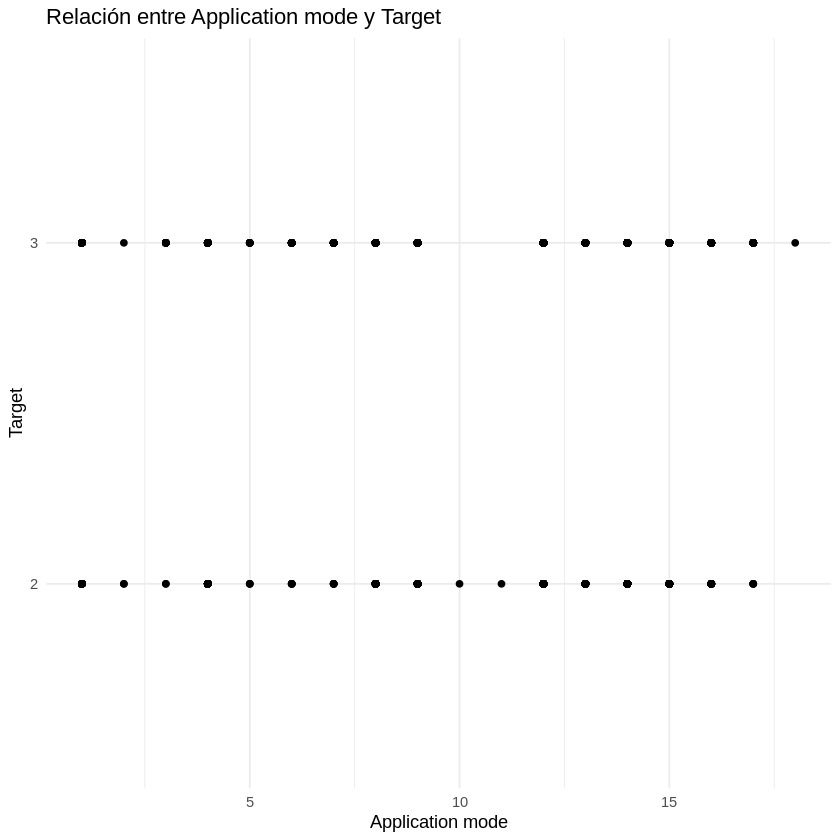

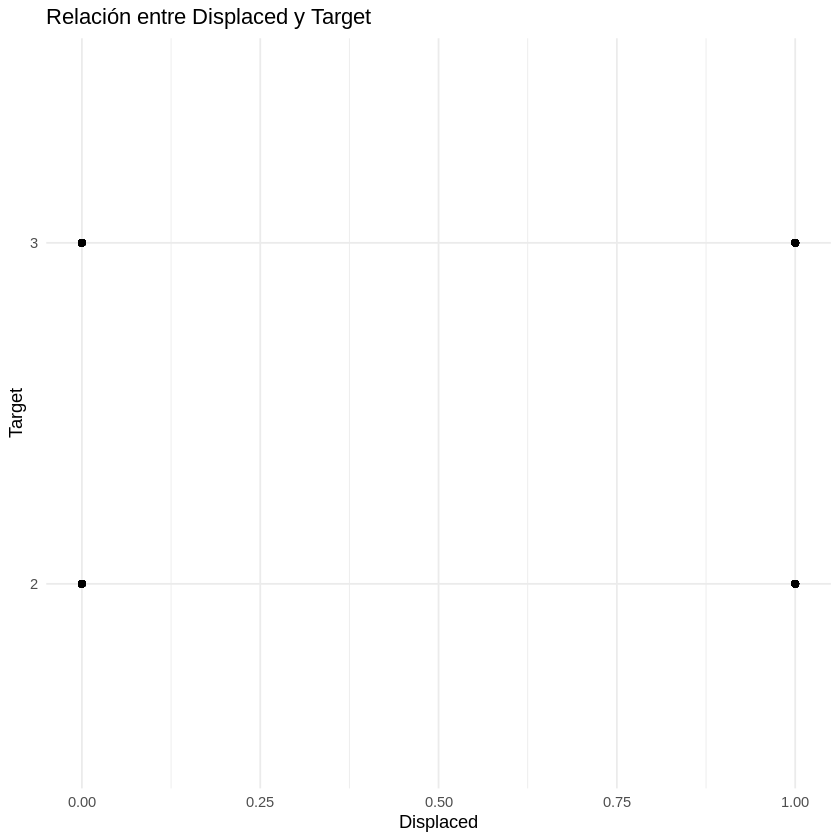

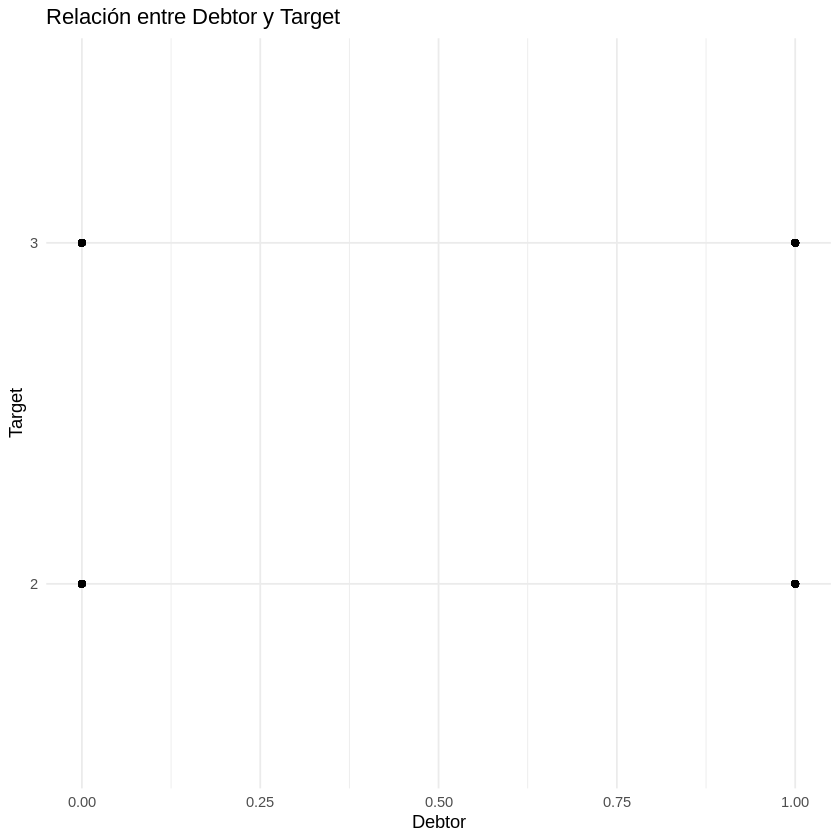

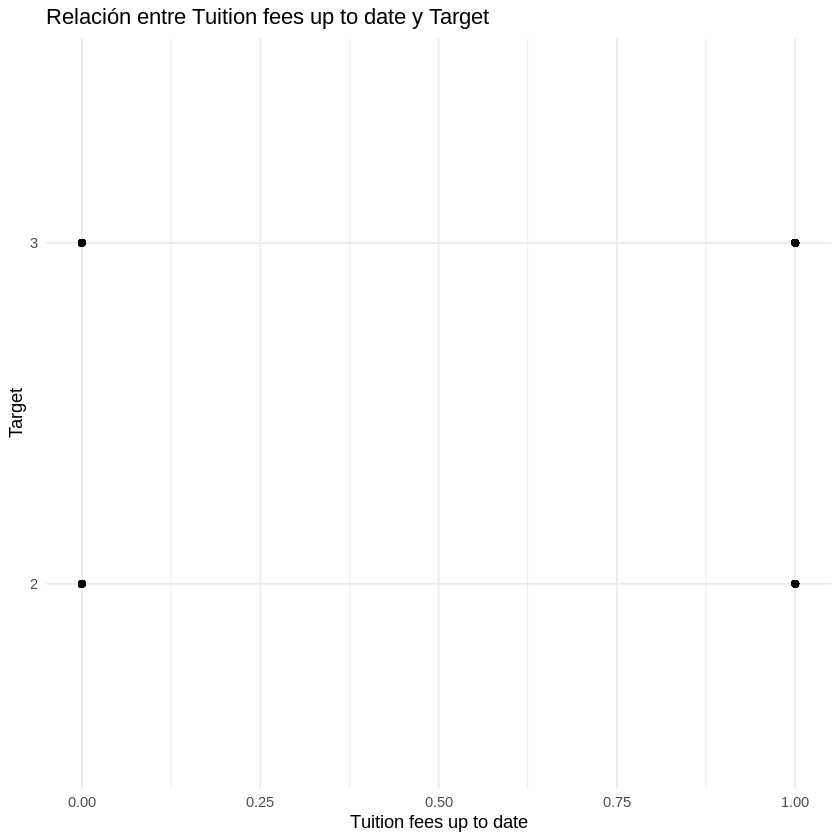

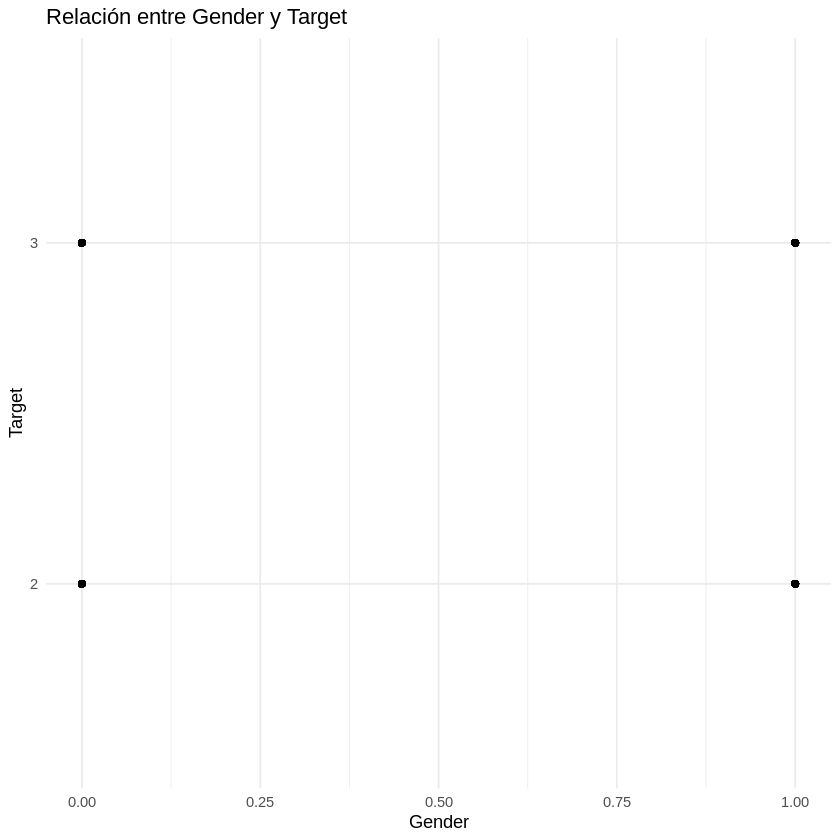

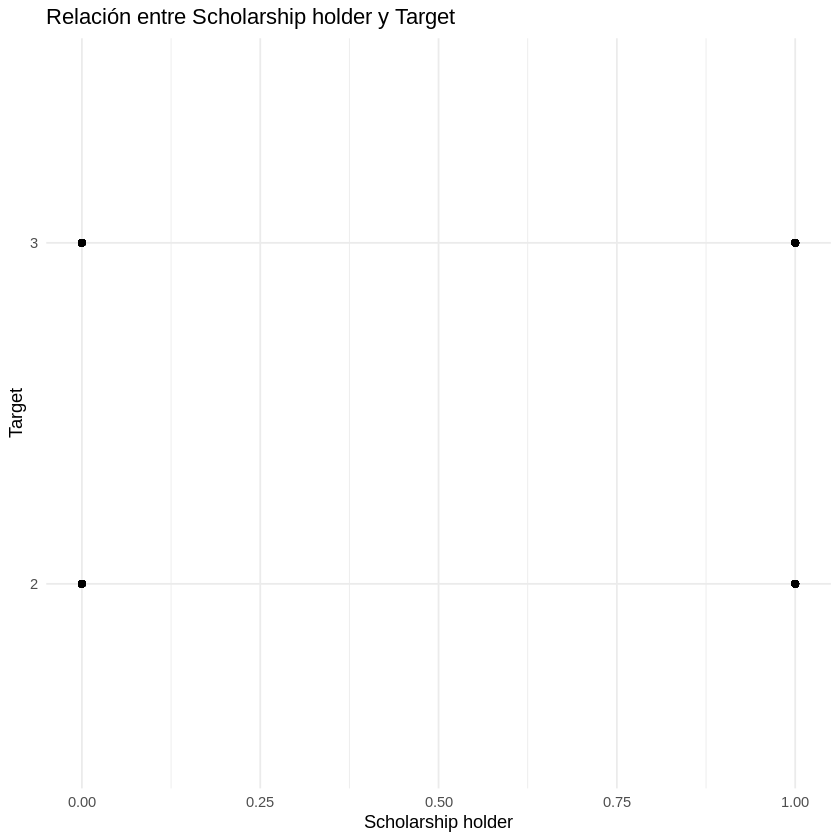

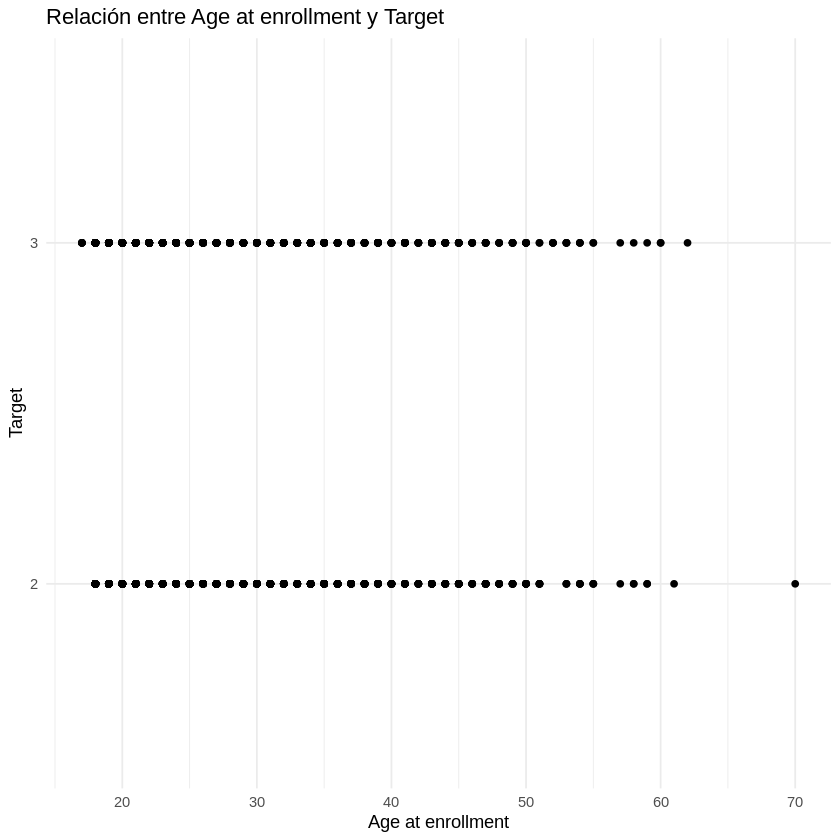

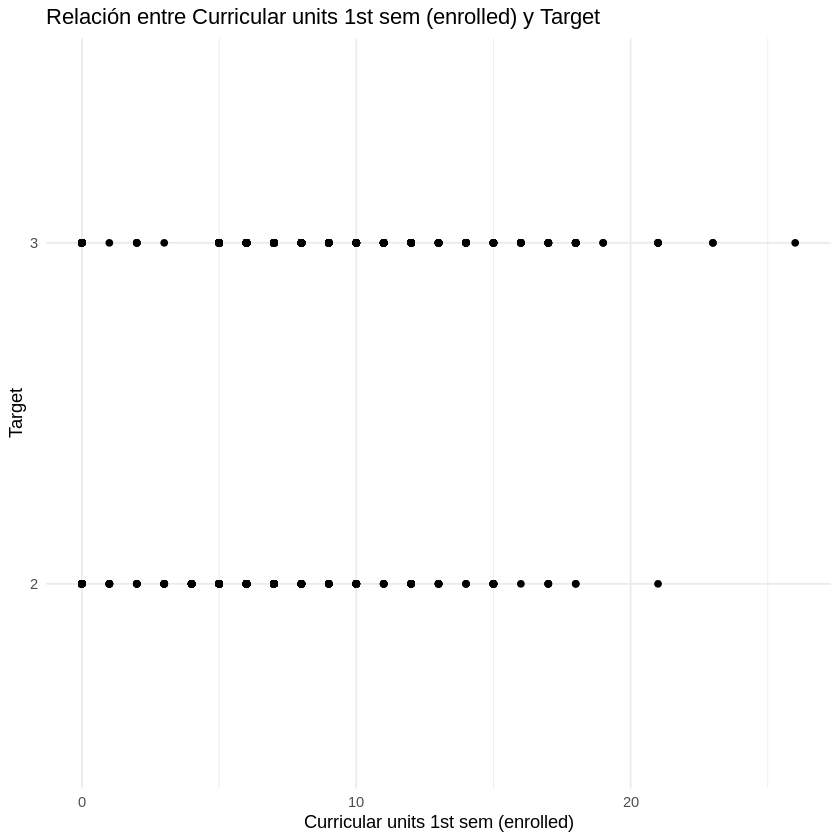

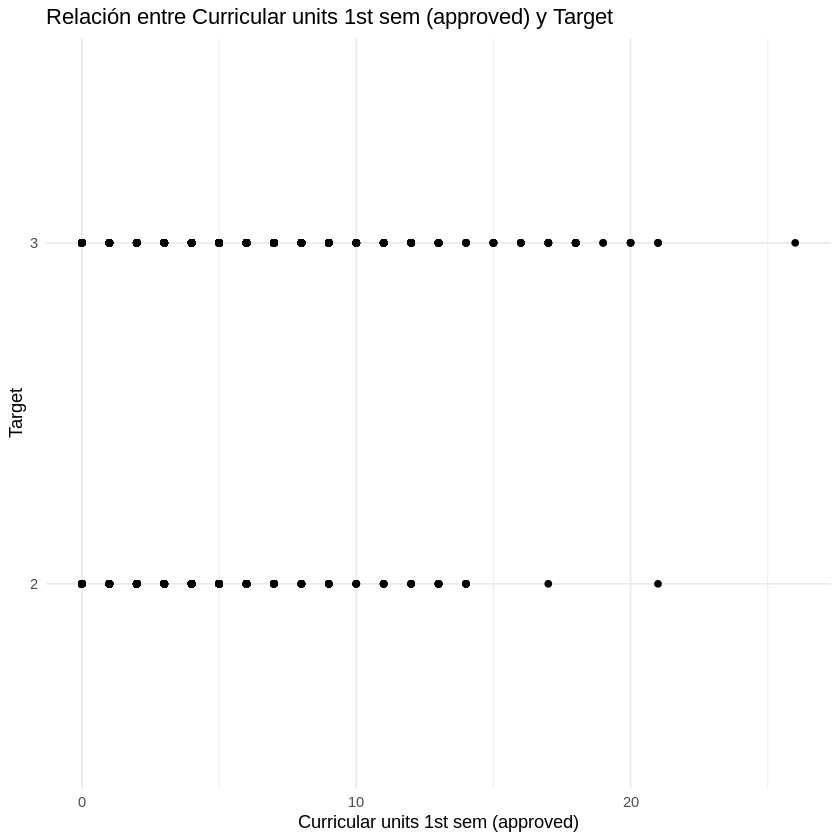

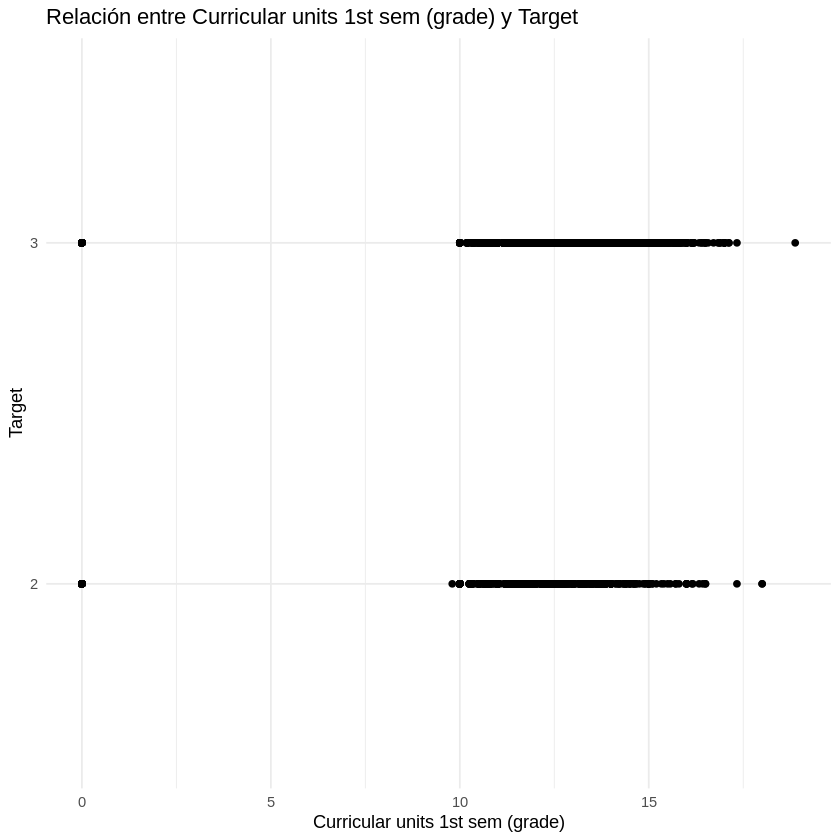

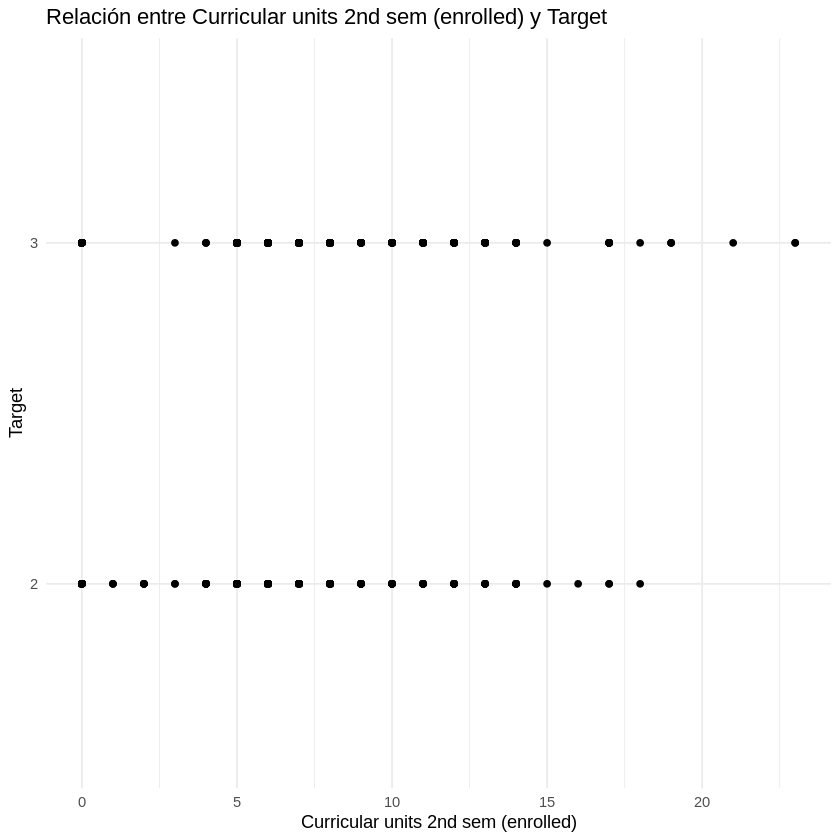

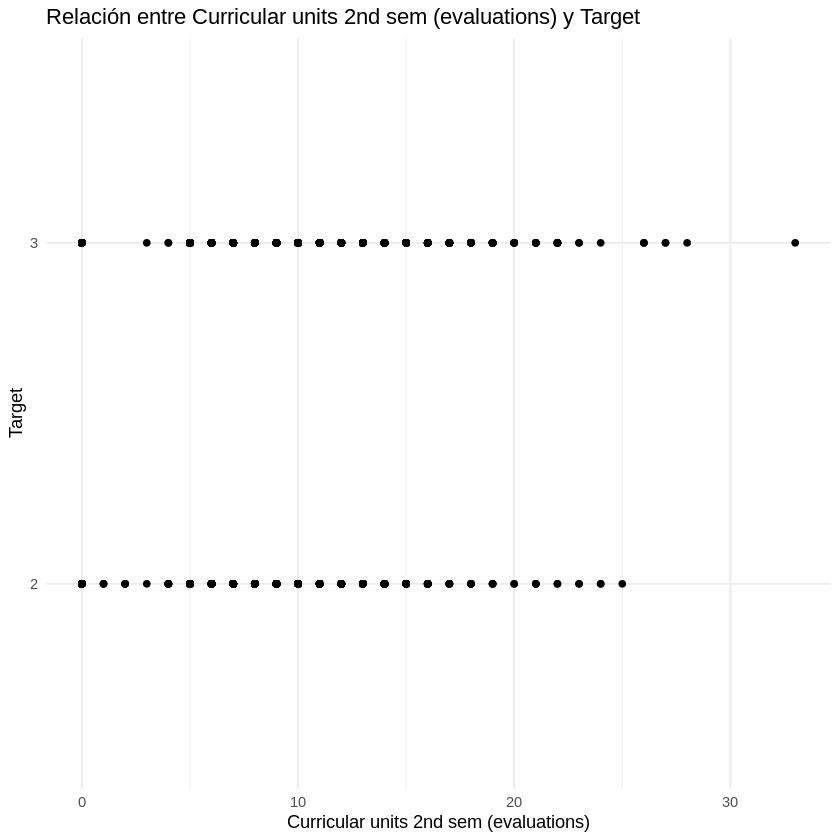

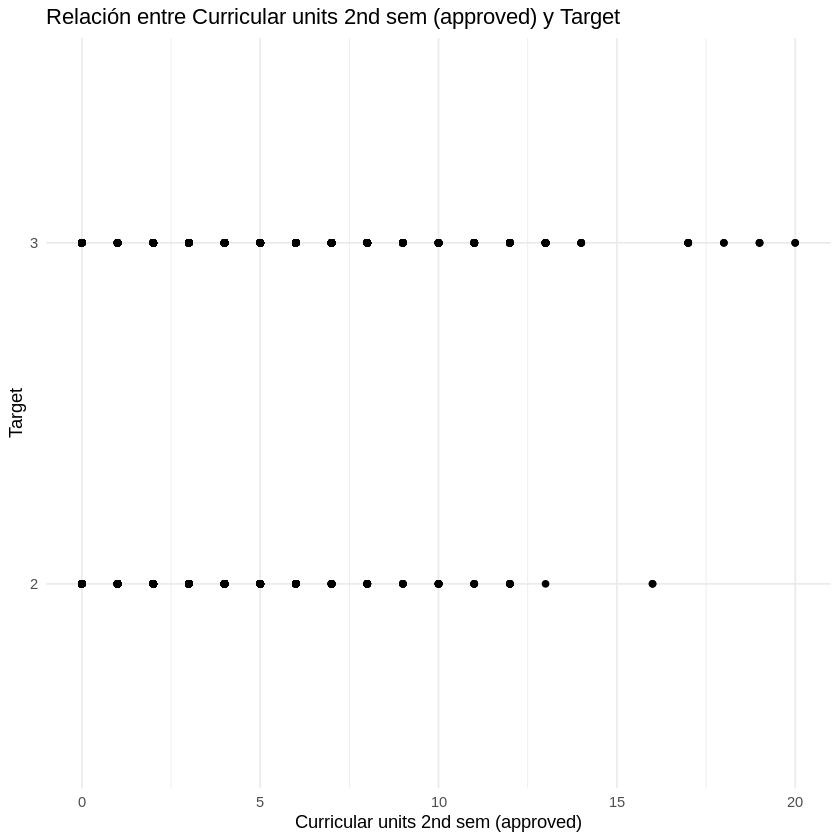

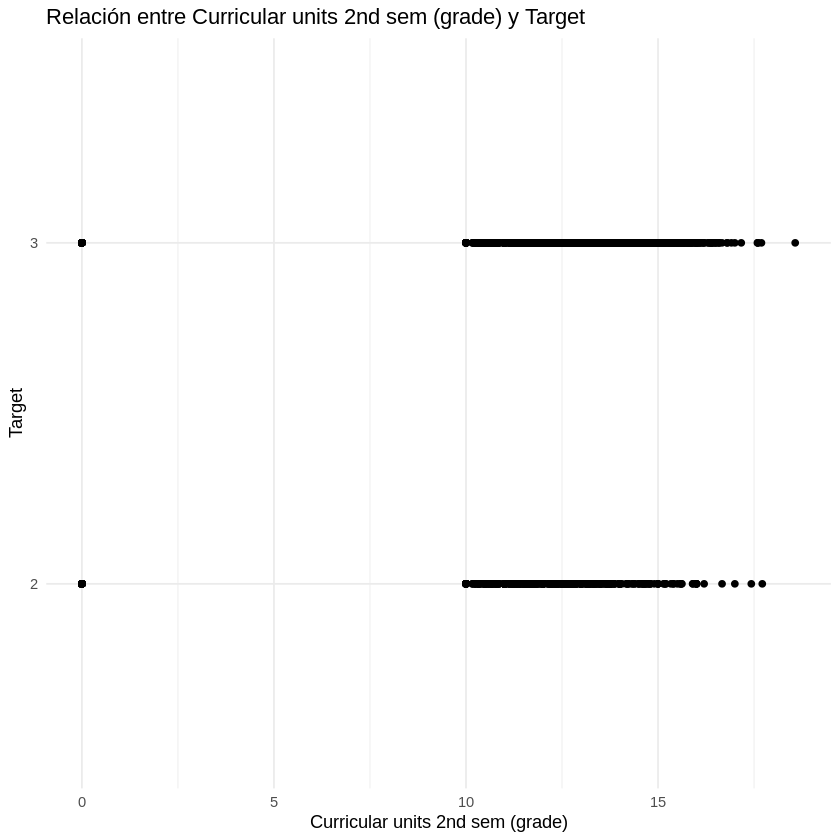

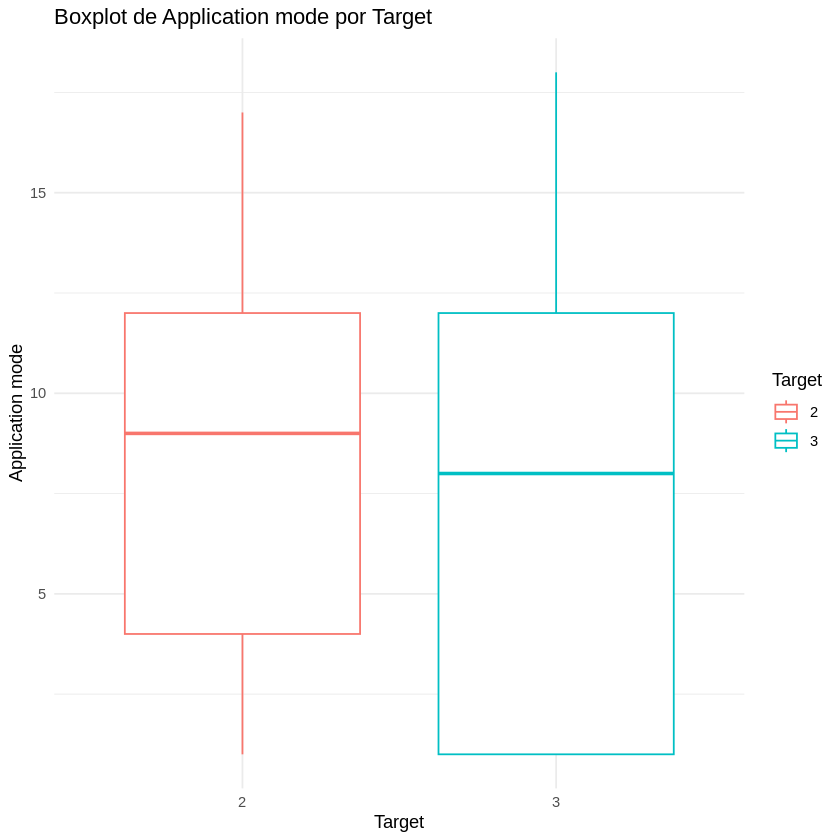

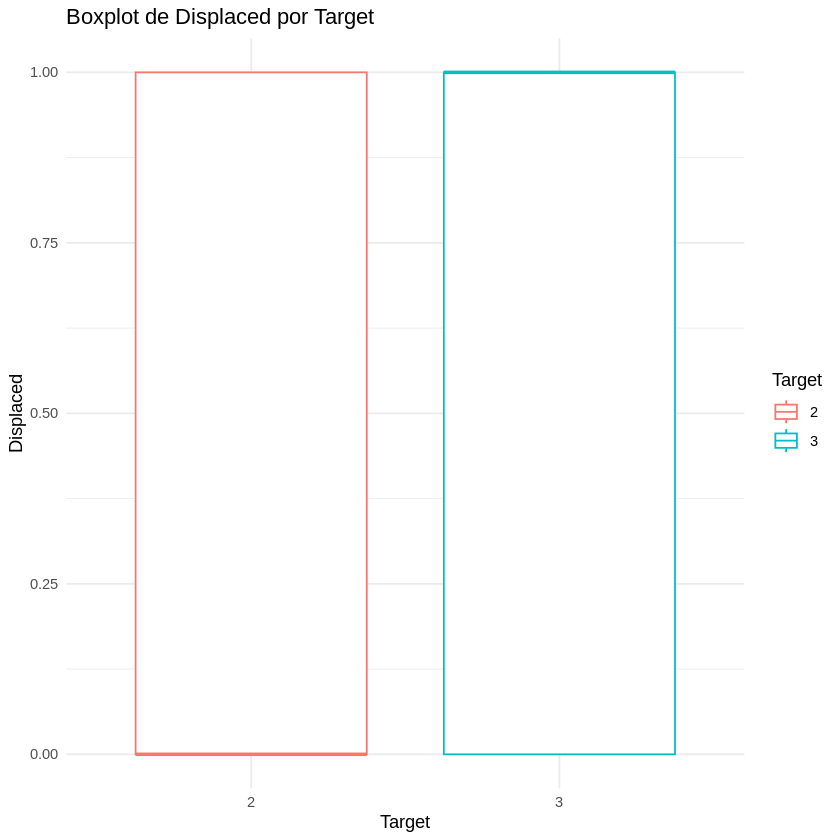

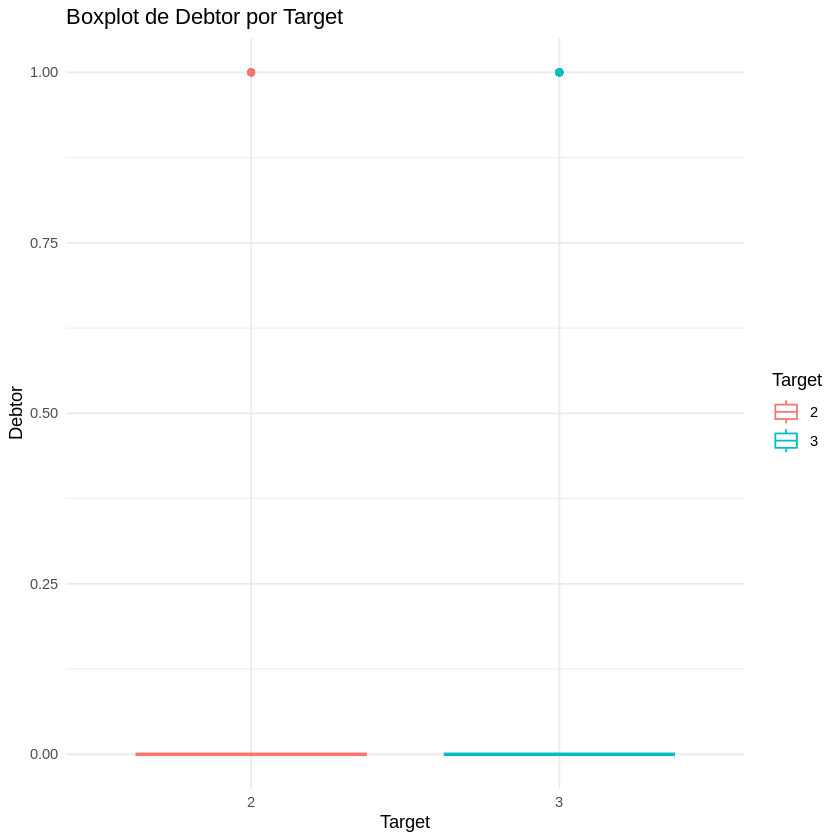

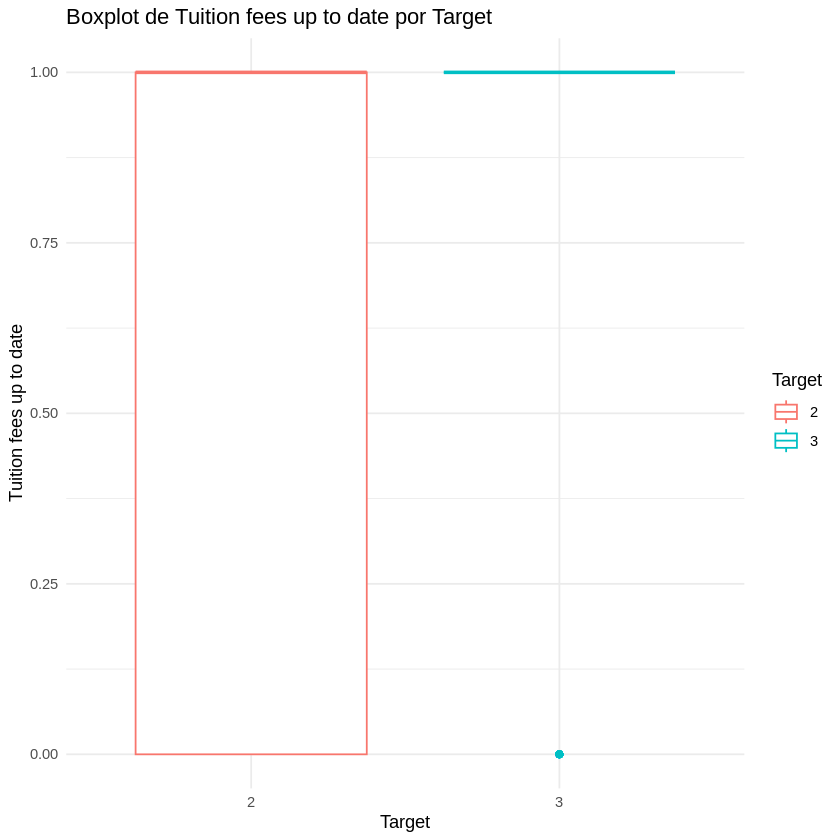

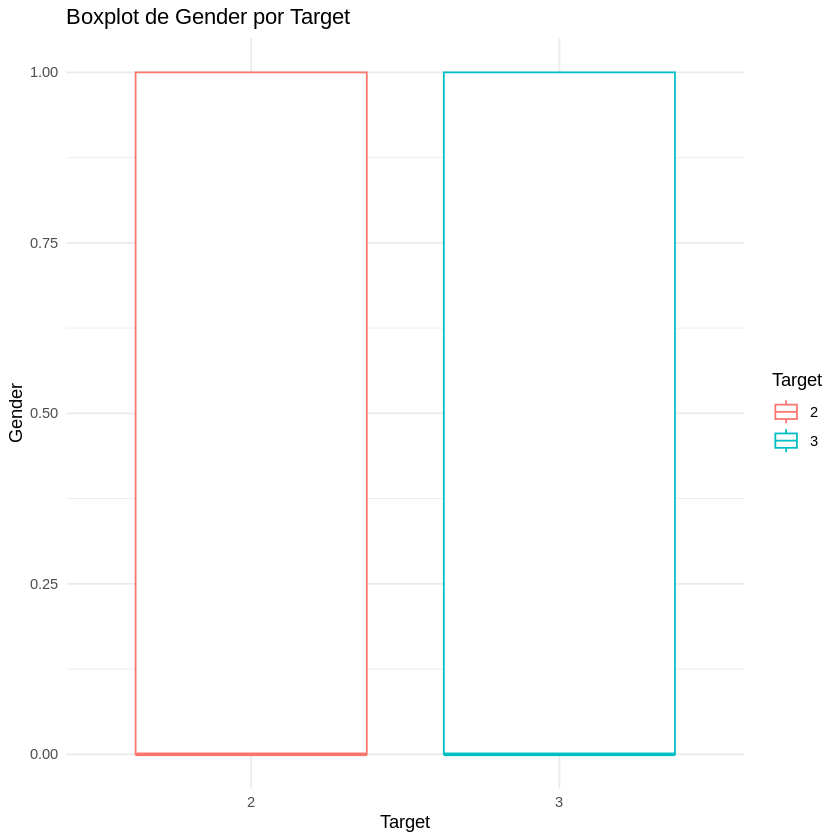

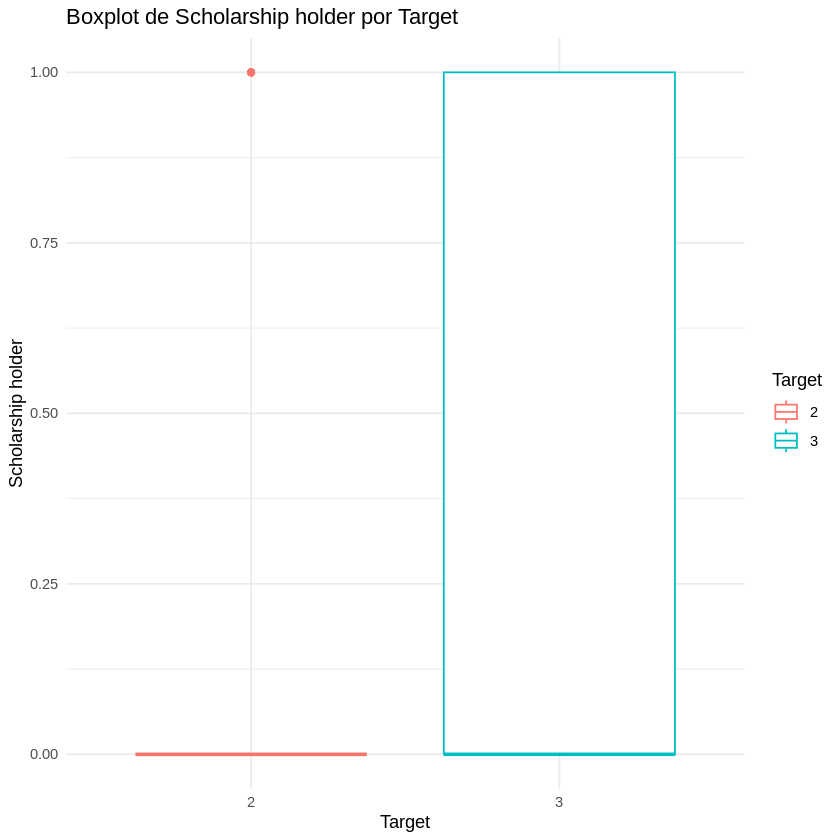

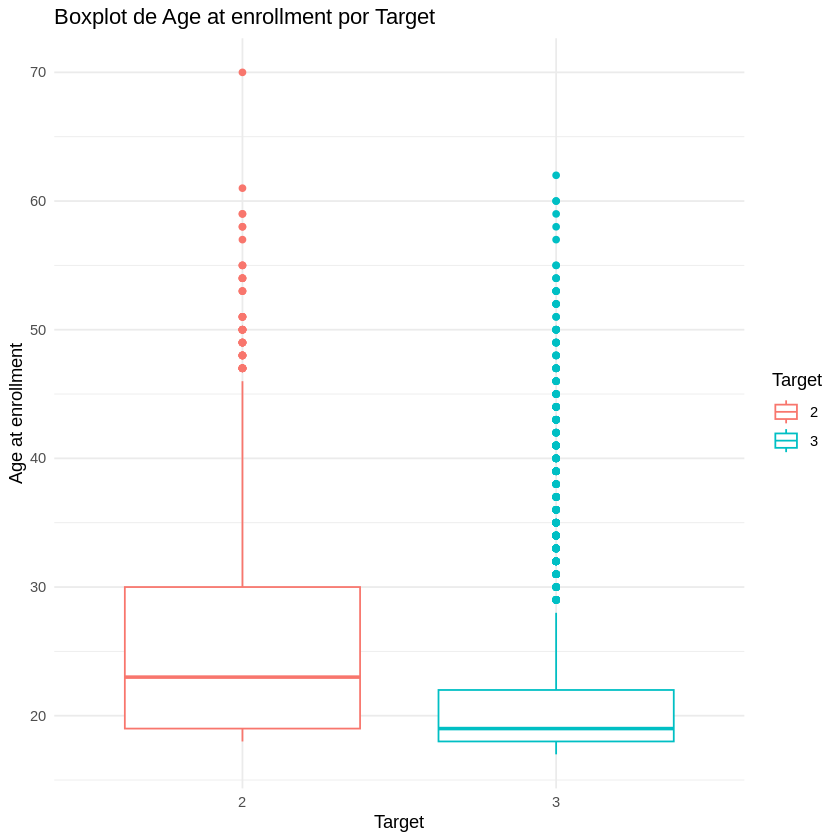

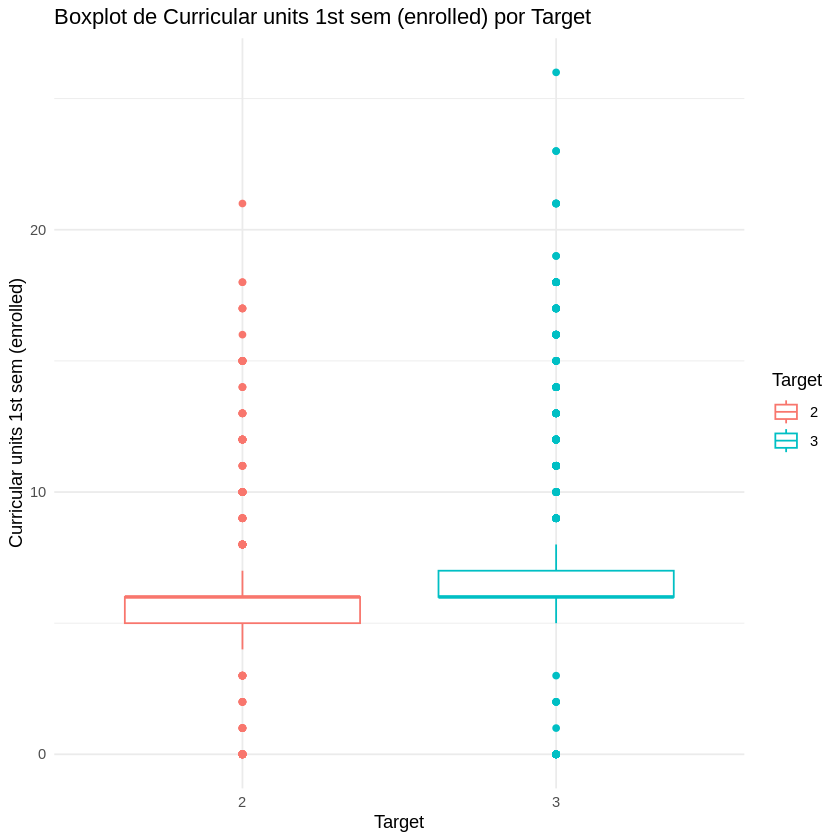

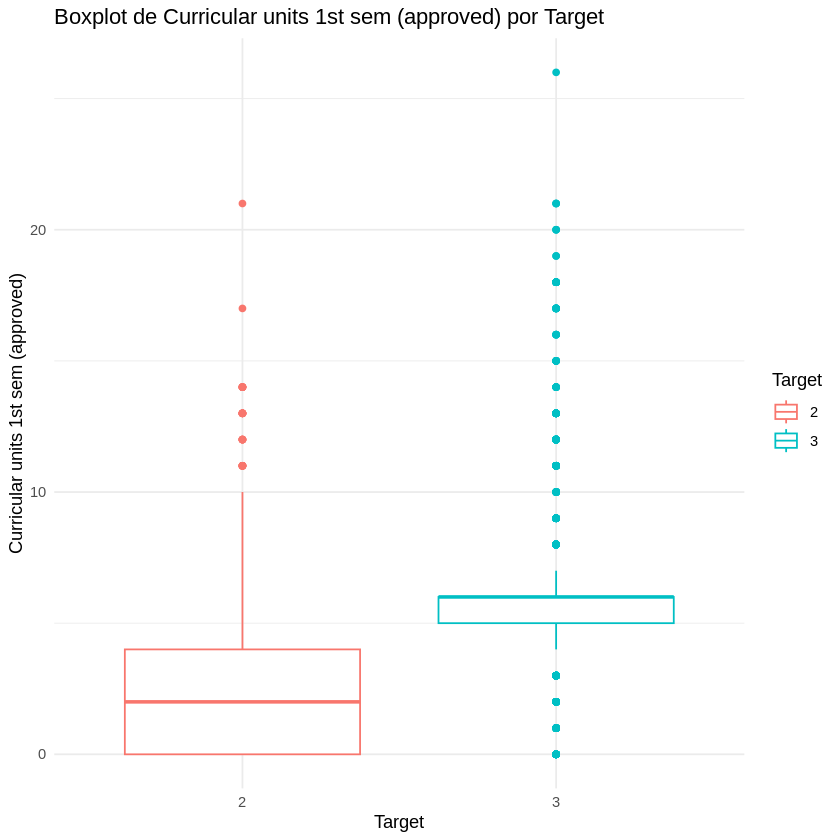

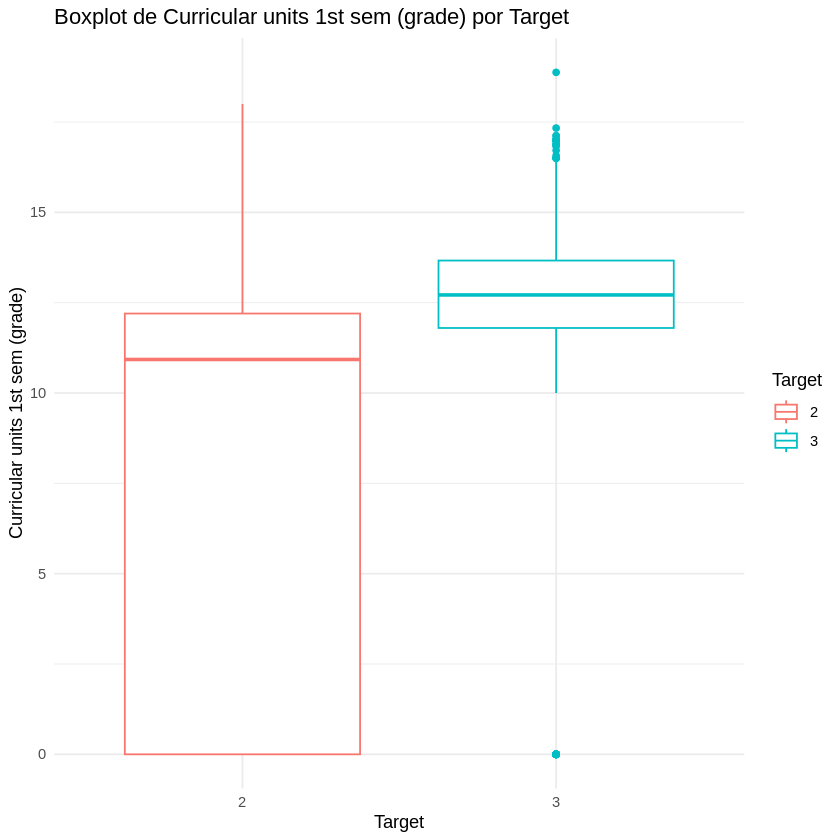

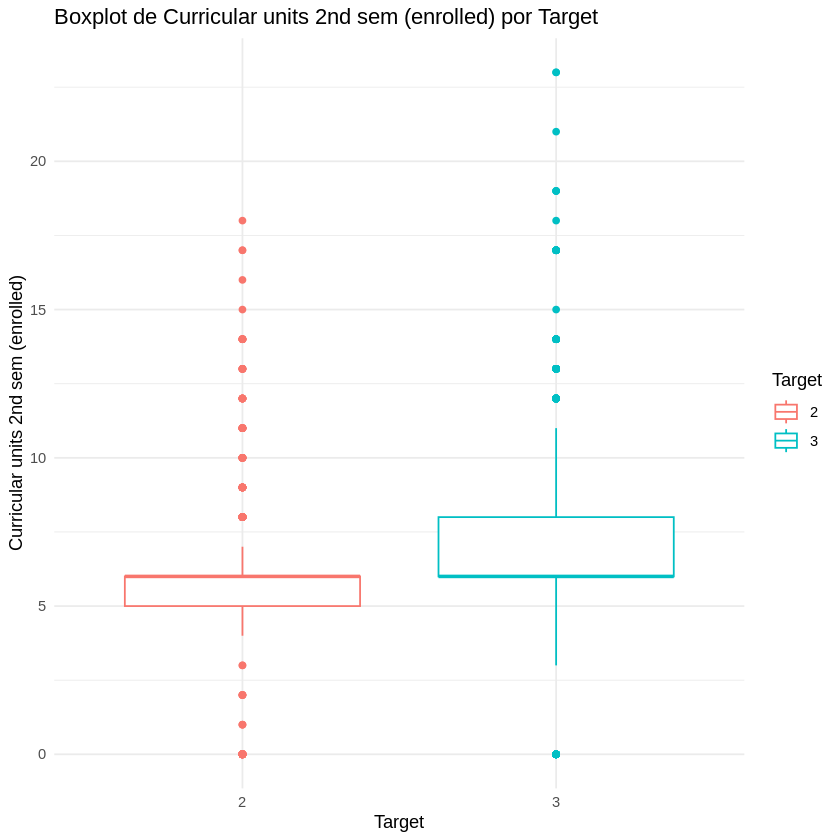

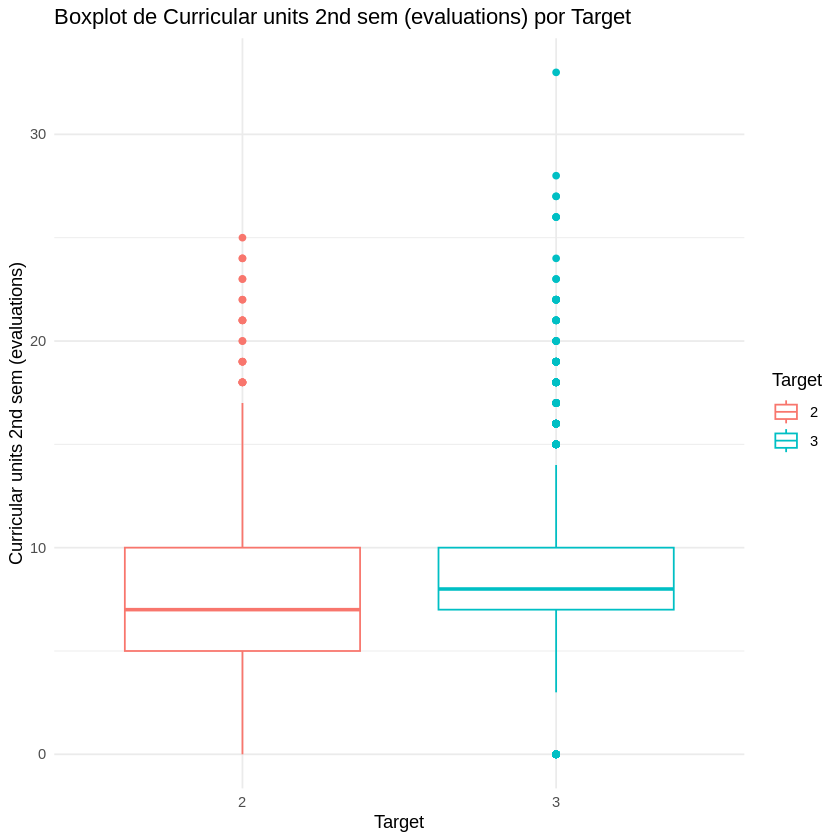

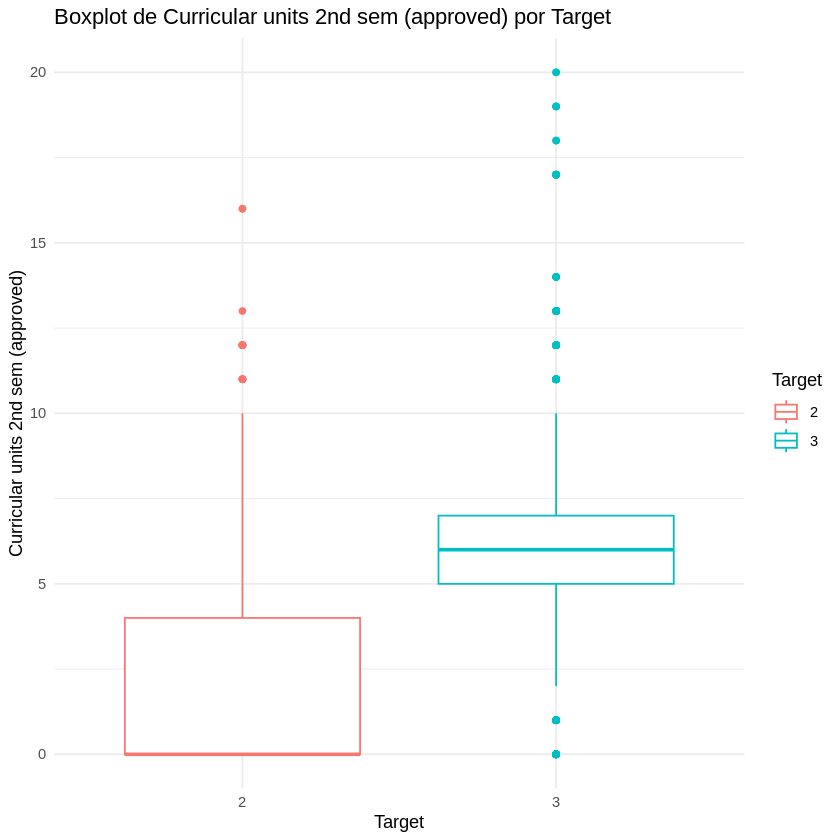

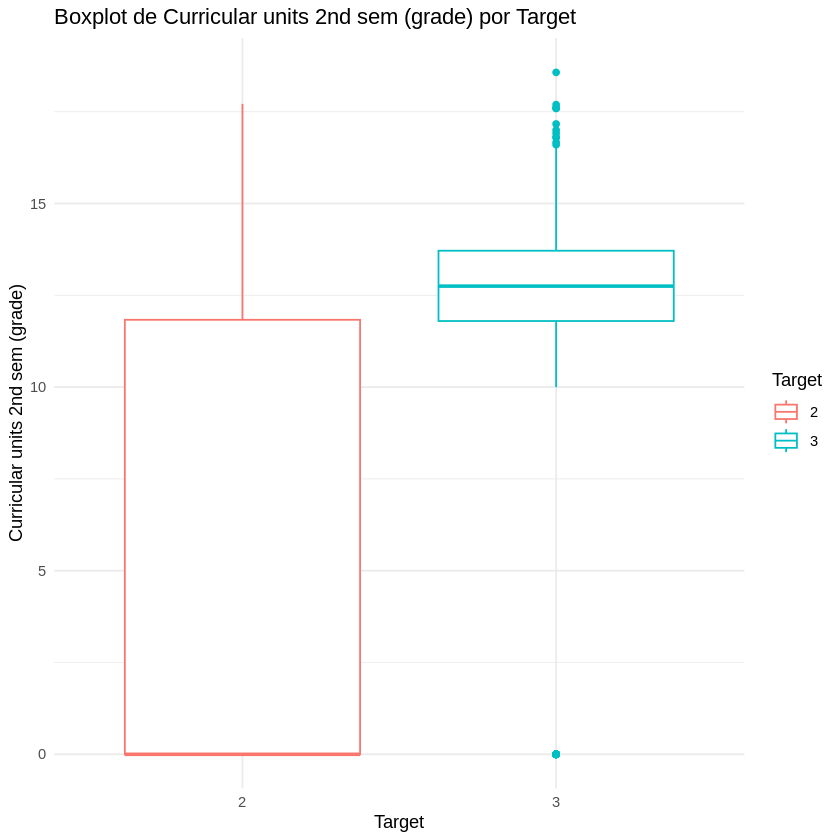

In [84]:
# Renombrar las columnas para que no tengan espacios
colnames(students_data_relevant) <- make.names(colnames(students_data_relevant), unique = TRUE)

# Convertir la columna target en un factor para los boxplots
students_data_relevant$Target <- as.factor(students_data_relevant$Target)

# Crear gráficos de dispersión para las columnas relevantes
for (col in relevant_columns) {
  col_name <- make.names(col)
  if (col_name != "Target") {
    plot <- ggplot(students_data_relevant, aes_string(x = col_name, y = "Target")) +
      geom_point() +
      theme_minimal() +
      labs(title = paste("Relación entre", col, "y Target"),
           x = col,
           y = "Target")
    print(plot)
  }
}

# Crear boxplots para las columnas relevantes
for (col in relevant_columns) {
  col_name <- make.names(col)
  if (col_name != "Target") {
    plot <- ggplot(students_data_relevant, aes_string(x = "Target", y = col_name, color = "Target")) +
      geom_boxplot() +
      theme_minimal() +
      labs(title = paste("Boxplot de", col, "por Target"),
           x = "Target",
           y = col)
    print(plot)
  }
}


Realizamos un análisis de Clusters

In [88]:
# Renombrar las columnas para eliminar espacios y caracteres especiales
colnames(df) <- make.names(colnames(df), unique = TRUE)
print(colnames(df))

# Seleccionar solo columnas numéricas para el clustering
numeric_columns <- df %>% select_if(is.numeric)

# Eliminar filas con valores NA, NaN o Inf
numeric_columns_clean <- numeric_columns[complete.cases(numeric_columns),]

# Verificar el número de observaciones restantes
num_observations <- nrow(numeric_columns_clean)
print(num_observations)

if (num_observations < 2) {
  stop("No hay suficientes observaciones para realizar clustering.")
}

# Imputar valores faltantes con la media de cada columna
numeric_columns_imputed <- numeric_columns
for (i in 1:ncol(numeric_columns_imputed)) {
  numeric_columns_imputed[is.na(numeric_columns_imputed[, i]), i] <- mean(numeric_columns_imputed[, i], na.rm = TRUE)
}

# Normalizar los datos
numeric_columns_scaled <- scale(numeric_columns_imputed)

# Determinar el número óptimo de clusters usando el método del codo
wss <- (nrow(numeric_columns_scaled) - 1) * sum(apply(numeric_columns_scaled, 2, var))
for (i in 2:15) {
  wss[i] <- sum(kmeans(numeric_columns_scaled, centers = i)$withinss)
}

# Graficar el método del codo
png("elbow_plot.png", width = 1500, height = 1500)
plot(1:15, wss, type = "b", xlab = "Number of Clusters", ylab = "Within groups sum of squares")
dev.off()

# Aplicar K-means con el número óptimo de clusters (ajustar según el gráfico del codo)
set.seed(123)
optimal_clusters <- 3  # Ajustar según el gráfico del codo
kmeans_result <- kmeans(numeric_columns_scaled, centers = optimal_clusters)

# Añadir los clusters al dataframe original
df$Cluster <- as.factor(kmeans_result$cluster)

# Visualizar los clusters en un gráfico de dispersión
png("cluster_plot.png", width = 1500, height = 1500)
ggplot(df, aes(x = Curricular.units.1st.sem..grade., y = Curricular.units.2nd.sem..grade., color = Cluster)) +
  geom_point() +
  theme_minimal() +
  labs(title = "Gráfico de Clusters", x = "Nota Unidades Curriculares 1er Semestre", y = "Nota Unidades Curriculares 2do Semestre")
dev.off()

 [1] "Marital.status"                                
 [2] "Application.mode"                              
 [3] "Application.order"                             
 [4] "Course"                                        
 [5] "Daytime.evening.attendance"                    
 [6] "Previous.qualification"                        
 [7] "Nacionality"                                   
 [8] "Mother.s.qualification"                        
 [9] "Father.s.qualification"                        
[10] "Mother.s.occupation"                           
[11] "Father.s.occupation"                           
[12] "Displaced"                                     
[13] "Educational.special.needs"                     
[14] "Debtor"                                        
[15] "Tuition.fees.up.to.date"                       
[16] "Gender"                                        
[17] "Scholarship.holder"                            
[18] "Age.at.enrollment"                             
[19] "International"        

Warning message in mean.default(numeric_columns_imputed[, i], na.rm = TRUE):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(numeric_columns_imputed[, i], na.rm = TRUE):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(numeric_columns_imputed[, i], na.rm = TRUE):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(numeric_columns_imputed[, i], na.rm = TRUE):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(numeric_columns_imputed[, i], na.rm = TRUE):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(numeric_columns_imputed[, i], na.rm = TRUE):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(numeric_columns_imputed[, i], na.rm = TRUE):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(numeric_columns_imputed[, i], na.rm = TRUE):
“argument is not numeric or

png 
  2

png 
  2

Realizamos una regresión lineal

In [89]:
# Realizar regresión lineal
model <- lm(Curricular.units.2nd.sem..grade. ~ Curricular.units.1st.sem..grade., data = df)
summary(model)

# Visualizar la regresión lineal
png("regression_plot.png", width = 1500, height = 1500)
ggplot(df, aes(x = Curricular.units.1st.sem..grade., y = Curricular.units.2nd.sem..grade.)) +
  geom_point() +
  geom_smooth(method = "lm", col = "blue") +
  theme_minimal() +
  labs(title = "Regresión Lineal", x = "Nota Unidades Curriculares 1er Semestre", y = "Nota Unidades Curriculares 2do Semestre")
dev.off()


Call:
lm(formula = Curricular.units.2nd.sem..grade. ~ Curricular.units.1st.sem..grade., 
    data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.1855  -0.6468   0.4056   1.0452  15.3532 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      0.646802   0.103448   6.252 4.42e-10 ***
Curricular.units.1st.sem..grade. 0.900626   0.008848 101.784  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.85 on 4422 degrees of freedom
Multiple R-squared:  0.7009,	Adjusted R-squared:  0.7008 
F-statistic: 1.036e+04 on 1 and 4422 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula = 'y ~ x'


png 
  2

Realizamos una tabla de contingencia entre Target y Estado Marital

In [90]:
# Tabla de contingencia entre Target y Marital.status.
contingency_table <- table(df$Target, df$Marital.status)
print(contingency_table)

# Visualizar la tabla de contingencia
png("contingency_table_plot.png", width = 1500, height = 1500)
ggplot(as.data.frame(contingency_table), aes(Var1, Freq, fill = Var2)) +
  geom_bar(stat = "identity", position = "dodge") +
  theme_minimal() +
  labs(title = "Tabla de Contingencia entre Target y Estado Civil", x = "Target", y = "Frecuencia")
dev.off()

   
       1    2    3    4    5    6
  2 1184  179    1   42   11    4
  3 2735  200    3   49   14    2


png 
  2